#**Installing required Libraries**

In [ ]:
!pip install serpapi
!pip install python-dotenv
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 5.2 MB/s eta 0:00:00


#**Importing necessary libraries**

*   OS (for operating system commands)
*   Serp API (for scraping data from Google Playstore Products)
*   Json (Parsing JSON Data from web APIs)
*   Pandas (Python library for analysis)



In [ ]:
import os
import serpapi
from dotenv import load_dotenv
import json
import pandas as pd
from IPython.display import display, HTML

# Set the API key (or load from environment variable)
os.environ['SERPAPI'] = 'api_key'
load_dotenv()

api_key = os.getenv("SERPAPI")
client = serpapi.Client(api_key=api_key)

# Search parameters
search_params = {
    "engine": "google_play_product",
    "product_id": "ai.praktika.android",
    "store": "apps",
    "all_reviews": "True",
    "num": 199
}

# Initial search
results = client.search(**search_params)

# Gather reviews
all_reviews = results.get('reviews', [])
print(f"Collected {len(all_reviews)} reviews so far...")

# Pagination loop
while 'serpapi_pagination' in results and 'next_page_token' in results['serpapi_pagination']:
    search_params['next_page_token'] = results['serpapi_pagination']['next_page_token']
    results = client.search(**search_params)

    # Add new reviews
    reviews = results.get('reviews', [])
    all_reviews.extend(reviews)
    print(f"Collected {len(all_reviews)} reviews so far...")

# Final review count
print(f"Total reviews collected: {len(all_reviews)}")


Collected 199 reviews so far...
Collected 398 reviews so far...
Collected 597 reviews so far...
Collected 796 reviews so far...
Collected 995 reviews so far...
Collected 1194 reviews so far...
Collected 1393 reviews so far...
Collected 1592 reviews so far...
Collected 1791 reviews so far...
Collected 1990 reviews so far...
Collected 2189 reviews so far...
Collected 2388 reviews so far...
Collected 2587 reviews so far...
Collected 2786 reviews so far...
Collected 2985 reviews so far...
Collected 3184 reviews so far...
Collected 3383 reviews so far...
Collected 3582 reviews so far...
Collected 3781 reviews so far...
Collected 3980 reviews so far...
Collected 4179 reviews so far...
Collected 4378 reviews so far...
Collected 4577 reviews so far...
Collected 4776 reviews so far...
Collected 4975 reviews so far...
Collected 5174 reviews so far...
Collected 5373 reviews so far...
Collected 5572 reviews so far...
Collected 5771 reviews so far...
Collected 5970 reviews so far...
Collected 6169 

# **Converting All data to a csv file for analysis**

In [ ]:
#eviews to a pandas DataFrame
df = pd.DataFrame(all_reviews)

#DataFrame to a CSV file
csv_file = "google_play_reviews.csv"
df.to_csv(csv_file, index=False)

print(f"Saved {len(all_reviews)} reviews to {csv_file}")


Collected 199 reviews so far...
Collected 398 reviews so far...
Collected 597 reviews so far...
Collected 796 reviews so far...
Collected 995 reviews so far...
Collected 1194 reviews so far...
Collected 1393 reviews so far...
Collected 1592 reviews so far...
Collected 1791 reviews so far...
Collected 1990 reviews so far...
Collected 2189 reviews so far...
Collected 2388 reviews so far...
Collected 2587 reviews so far...
Collected 2786 reviews so far...
Collected 2985 reviews so far...
Collected 3184 reviews so far...
Collected 3383 reviews so far...
Collected 3582 reviews so far...
Collected 3781 reviews so far...
Collected 3980 reviews so far...
Collected 4179 reviews so far...
Collected 4378 reviews so far...
Collected 4577 reviews so far...
Collected 4776 reviews so far...
Collected 4975 reviews so far...
Collected 5174 reviews so far...
Collected 5373 reviews so far...
Collected 5572 reviews so far...
Collected 5771 reviews so far...
Collected 5970 reviews so far...
Collected 6169 

# **Downloading the file to local system**

In [ ]:
from google.colab import files
files.download("google_play_reviews.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Reading the DataFrame**

In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('google_play_reviews.csv')
print(df)

                                        id                 title  \
0     7132c919-cfd3-46bd-8bff-766421f38f82            Dr Sami G.   
1     a05ecc11-a0b7-4737-b578-62ec6317f6e6           Imdad Rasel   
2     b083bc50-5952-44ba-ae2a-0252131f05e0     simone prosdocimo   
3     1425fdfb-6a1c-457f-9dbf-8e88683f99a1                   김미승   
4     3b5c84ef-a1fe-469f-ae2d-6624d889c324  Luis Henrique Pinudo   
...                                    ...                   ...   
7416  43a27125-e197-451c-bee1-bed380d4ef25             Joni Papa   
7417  4e6cc271-a801-471b-a837-65a6c4ce80d9            Usman khan   
7418  044f11b8-301d-47fd-9964-c3e6e35898f8             Dada Dada   
7419  190e1de4-3912-4d44-991e-cbc55f147f83       Evgenii Davydov   
7420  f0303e36-a475-4827-aa96-1624adcc559e         Khalef khalef   

                                                 avatar  rating  \
0     https://play-lh.googleusercontent.com/a/ACg8oc...     1.0   
1     https://play-lh.googleusercontent.com/a-/AL

# **Creating the Wordcloud for Text based analysis**

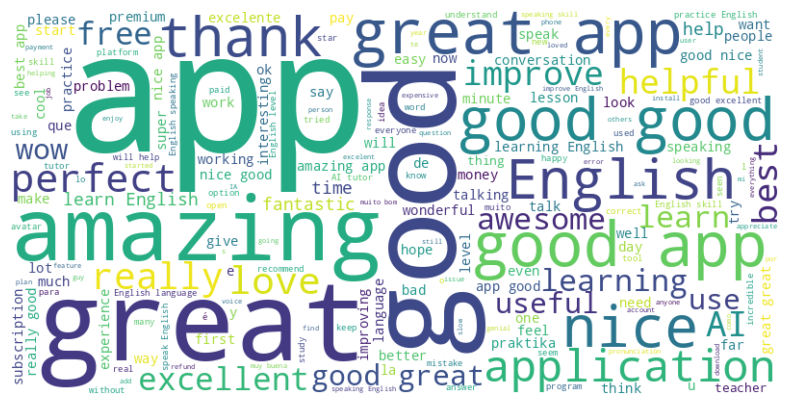

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/content/google_play_reviews.csv'
reviews_df = pd.read_csv(file_path)

# Combine all snippets into a single string
text = ' '.join(reviews_df['snippet'].dropna())

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# **Extracting Emojis from reviews**

In [ ]:
import pandas as pd
import emoji

# Load the CSV file into a DataFrame
csv_file = "google_play_reviews.csv"
df = pd.read_csv(csv_file)

# Function to extract emojis from text
def extract_emojis(text):
    return ''.join(char for char in text if char in emoji.EMOJI_DATA)

# Extract emojis from the relevant column (assumed column name is 'review_text')
df['emojis'] = df['snippet'].apply(lambda x: extract_emojis(str(x)))

# Save the DataFrame with extracted emojis to a new CSV file
csv_emojis_file = "extracted_emojis.csv"
df.to_csv(csv_emojis_file, index=False)

print(f"Saved extracted emojis to {csv_emojis_file}")


Saved extracted emojis to extracted_emojis.csv


# **Counting Each Emoji usage**

In [ ]:
import pandas as pd
from collections import Counter
import emoji

# Load the CSV file with extracted emojis
csv_file = "extracted_emojis.csv"
df = pd.read_csv(csv_file)

# Print column names to find the correct one
print("Columns in DataFrame:", df.columns)

# Assume the correct column name with emojis is 'emojis' (change if needed)
emoji_column = 'emojis'  # Update this if the actual column name is different

# Combine all emojis into a single list
all_emojis = df[emoji_column].dropna().apply(lambda x: list(x)).explode()

# Count occurrences of each individual emoji
emoji_counts = Counter(all_emojis)

# Print the emoji counts
for emoji_char, count in emoji_counts.items():
    print(f"{emoji_char}: {count}")


Columns in DataFrame: Index(['id', 'title', 'avatar', 'rating', 'snippet', 'likes', 'date',
       'iso_date', 'response', 'emojis'],
      dtype='object')
👍: 356
😒: 4
🤖: 1
💕: 3
💓: 3
👌: 70
❤: 110
🕺: 4
🤨: 1
😍: 74
🤩: 31
😔: 6
😁: 7
😞: 10
🌹: 11
🥰: 40
🫶: 4
😭: 10
🤦: 1
🏻: 43
♀: 1
😠: 2
🤧: 2
🗿: 2
🙏: 29
♥: 10
😌: 1
😀: 14
😊: 53
😂: 5
🫤: 2
👏: 41
🤣: 7
😄: 2
🤔: 1
🙂: 5
🤕: 5
😃: 25
😇: 5
👋: 1
😤: 1
🏼: 7
🙌: 9
😡: 2
✨: 5
❣: 7
👎: 14
😑: 4
🙄: 3
😶: 2
😐: 2
😅: 2
☺: 16
💗: 9
😳: 4
🔥: 13
💖: 4
🥹: 1
😉: 5
🏽: 4
🏾: 7
😜: 2
💯: 34
💪: 5
🥲: 6
🙃: 1
🖤: 1
🥺: 2
😕: 2
❌: 1
☹: 2
💫: 2
😎: 11
🩷: 12
🌸: 1
🩵: 1
🤗: 2
🫠: 1
😬: 1
🤥: 1
😋: 2
☝: 1
🤝: 1
😫: 4
🤑: 2
💞: 1
😆: 1
🤬: 4
🖕: 3
⭐: 15
😘: 10
😮: 1
🌎: 1
🤢: 3
🤮: 3
💜: 2
🧑: 1
🎓: 1
😚: 1
🥱: 1
😲: 5
😪: 1
🏿: 33
💝: 1
🚀: 2
🤟: 1
🫦: 1
😯: 4
🗣: 1
🧠: 1
✌: 2
🤌: 3
✅: 1
🙀: 1
🌟: 5
💚: 2
🥵: 1
🎊: 1
🫵: 28
🫣: 8
🤭: 1
🕊: 1
😻: 2
🌷: 2
🦁: 1
🤞: 1
🫡: 1
🥳: 5


# **Positve and negative emoji analysis**

In [ ]:
emoji_counts = {
    '👍': 356, '😒': 4, '🤖': 1, '💕': 3, '💓': 3, '👌': 70, '❤': 110, '🕺': 4, '🤨': 1, '😍': 74,
    '🤩': 31, '😔': 6, '😁': 7, '😞': 10, '🌹': 11, '🥰': 40, '🫶': 4, '😭': 10, '🤦': 1, '🏻': 43,
    '♀': 1, '😠': 2, '🤧': 2, '🗿': 2, '🙏': 29, '♥': 10, '😌': 1, '😀': 14, '😊': 53, '😂': 5,
    '🫤': 2, '👏': 41, '🤣': 7, '😄': 2, '🤔': 1, '🙂': 5, '🤕': 5, '😃': 25, '😇': 5, '👋': 1,
    '😤': 1, '🏼': 7, '🙌': 9, '😡': 2, '✨': 5, '❣': 7, '👎': 14, '😑': 4, '🙄': 3, '😶': 2,
    '😐': 2, '😅': 2, '☺': 16, '💗': 9, '😳': 4, '🔥': 13, '💖': 4, '🥹': 1, '😉': 5, '🏽': 4,
    '🏾': 7, '😜': 2, '💯': 34, '💪': 5, '🥲': 6, '🙃': 1, '🖤': 1, '🥺': 2, '😕': 2, '❌': 1,
    '☹': 2, '💫': 2, '😎': 11, '🩷': 12, '🌸': 1, '🩵': 1, '🤗': 2, '🫠': 1, '😬': 1, '🤥': 1,
    '😋': 2, '☝': 1, '🤝': 1, '😫': 4, '🤑': 2, '💞': 1, '😆': 1, '🤬': 4, '🖕': 3, '⭐': 15,
    '😘': 10, '😮': 1, '🌎': 1, '🤢': 3, '🤮': 3, '💜': 2, '🧑': 1, '🎓': 1, '😚': 1, '🥱': 1,
    '😲': 5, '😪': 1, '🏿': 33, '💝': 1, '🚀': 2, '🤟': 1, '🫦': 1, '😯': 4, '🗣': 1, '🧠': 1,
    '✌': 2, '🤌': 3, '✅': 1, '🙀': 1, '🌟': 5, '💚': 2, '🥵': 1, '🎊': 1, '🫵': 28, '🫣': 8,
    '🤭': 1, '🕊': 1, '😻': 2, '🌷': 2, '🦁': 1, '🤞': 1, '🫡': 1, '🥳': 5
}

# List of positive and negative emojis
positive_emojis = [
    '👍', '💕', '💓', '👌', '❤', '😍', '🤩', '😁', '🌹', '🥰', '🙏', '😀', '😊', '😂', '👏', '🤣',
    '😄', '🙂', '😃', '😇', '🙌', '✨', '❣', '☺', '💗', '🔥', '💖', '😉', '💯', '💪', '😎', '🩷',
    '💜', '⭐', '😘', '💚', '🎊', '🥳'
]

negative_emojis = [
    '😒', '🤨', '😔', '😞', '😭', '🤦', '😠', '🤧', '😌', '🫤', '🤔', '🤕', '👎', '😑', '🙄', '😶',
    '😐', '😳', '🥹', '🙃', '🖤', '🥺', '😕', '❌', '☹', '💫', '🫠', '😬', '🤥', '😋', '😫', '🤑',
    '😆', '🤬', '🖕', '🤢', '🤮', '🥱', '😲', '😪', '😯', '🫣', '🤭', '🕊', '🫦', '🫵', '🤞', '🫡'
]

# Calculate total positive and negative counts
positive_count = sum([emoji_counts[emoji] for emoji in positive_emojis if emoji in emoji_counts])
negative_count = sum([emoji_counts[emoji] for emoji in negative_emojis if emoji in emoji_counts])

# Calculate the total count of emojis
total_count = sum(emoji_counts.values())

# Calculate the percentages
positive_percentage = (positive_count / total_count) * 100
negative_percentage = (negative_count / total_count) * 100

positive_percentage, negative_percentage

(76.24548736462093, 11.768953068592056)

# **Visualizing it**

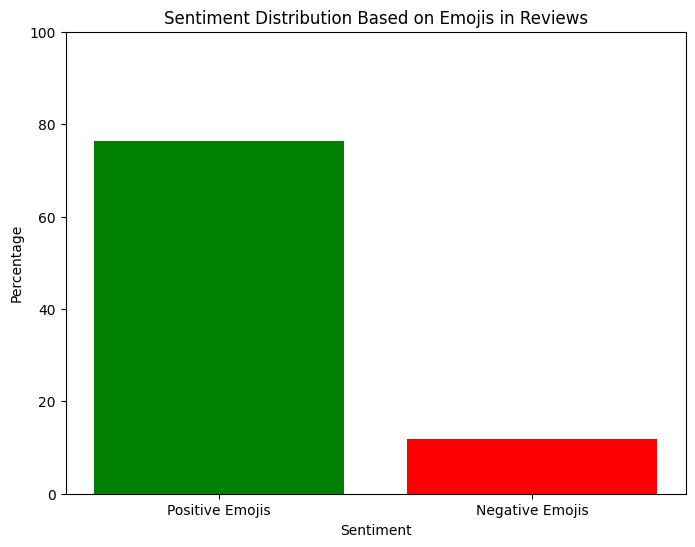

In [ ]:
import matplotlib.pyplot as plt

# Data
categories = ['Positive Emojis', 'Negative Emojis']
percentages = [76.25, 11.77]

# Create bar chart
plt.figure(figsize=(8, 6))
plt.bar(categories, percentages, color=['green', 'red'])
plt.ylim(0, 100)
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.title('Sentiment Distribution Based on Emojis in Reviews')
plt.show()

# **Sentiment Analysis using Textblob Python NLP library**

<ipython-input-1-d7157351f57d>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='sentiment_category', palette='viridis')


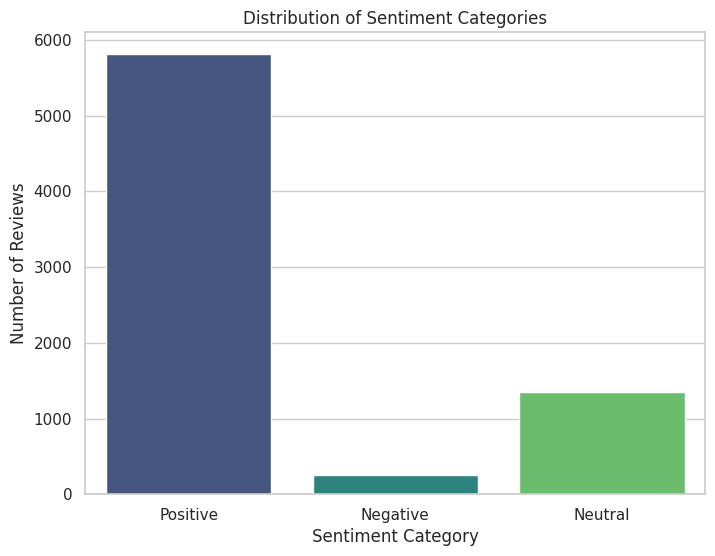

In [1]:
 import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = '/content/google_play_reviews.csv'
data = pd.read_csv(file_path)

# Perform sentiment analysis on the "snippet" column
data['sentiment'] = data['snippet'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Categorize the sentiment polarity into Positive, Negative, or Neutral
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

data['sentiment_category'] = data['sentiment'].apply(categorize_sentiment)

# Set the style for the plots
sns.set(style="whitegrid")

# Plot the distribution of sentiment categories
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='sentiment_category', palette='viridis')
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Reviews')
plt.show()
